<a href="https://colab.research.google.com/github/LennyRBriones/huggingface/blob/main/computer_vision_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision with Hugging face

## Downloading a dataset from the hub of hugging face & training using transformers

https://huggingface.co/datasets/beans

In [1]:
#With this command we cancel the preview of te downloading
%%capture

!pip install datasets transformers

In [2]:
from datasets import load_dataset
              #here we use the id of the dataset
ds = load_dataset("beans")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

## Exploring data

In [5]:
example = ds["train"][200]
example

{'image_file_path': '/root/.cache/huggingface/datasets/downloads/extracted/b0a21163f78769a2cf11f58dfc767fb458fc7cea5c05dccc0144a2c0f0bc1292/train/angular_leaf_spot/angular_leaf_spot_train.279.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7F173789A7C0>,
 'labels': 0}

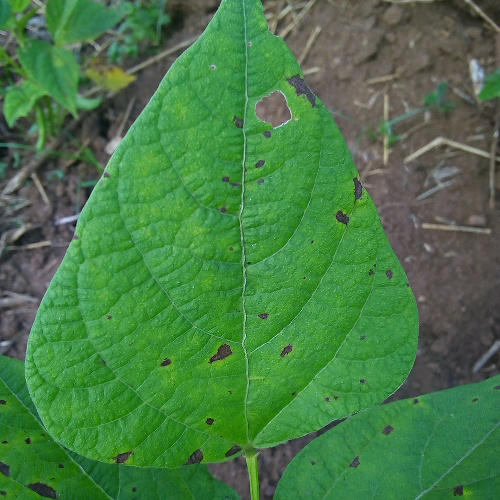

In [7]:
image = example["image"]
image

In [9]:
labels = ds["train"].features["labels"]
labels

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

As we can see, the labels are in int class, we need to transfor the class to get a label of what we get as label usind "inst2str" 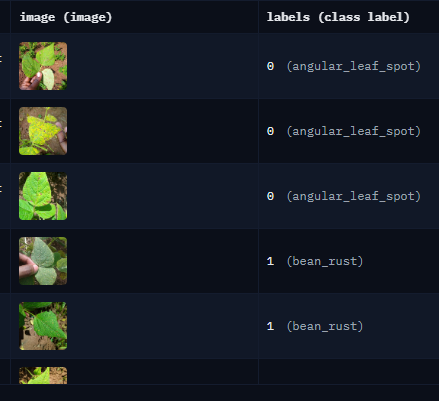

In [10]:
labels.int2str(example["labels"])

'angular_leaf_spot'

## Feature Extractor

This is neccesary to transform the inputs in thi case the images, to the neccesary shape of the image, that´s because the model was train with specific shape of images